Гопиенко Александр
КИ22-17/2Б
Вариант 7


# Задачи:
Выполнение практической работы предполагает решение
следующий задач:
1. Визуальный анализ исходных данных
2. Поиск аномальных значений
3. Поиск и восстановление отсутствующих значений
4. Преобразование данных

# Цель: 
знакомство с основными задачами предварительной 
обработки исходных данных, изучение основных методов 
предварительной обработки данных, формирование навыков 
выполнения предварительной обработки исходных данных с 
помощью языка программирования Python.

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sigmaclip
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import numpy as np

Датасет для работы

In [144]:
df = pd.read_excel("first_practice_dataframe.xlsx")
df = df[['cat11_nationality', 'cat14_temprature', 'num1_8', 'num2_8', 'num3_8']]
df['num3_8'] = pd.to_numeric(df['num3_8'], errors='coerce')

df.head()

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8
0,german,Very Hot,247.159357,233.346229,731.516449
1,German,cold,668.812973,96.173995,726.139127
2,german,Very Hot,236.218871,1.799639,742.322785
3,German,Very Hot,989.929212,526.862875,767.297661
4,german,cold,88.636793,64.834346,767.944298


Просмотрим информацию о данных

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  980 non-null    object 
 1   cat14_temprature   984 non-null    object 
 2   num1_8             1000 non-null   float64
 3   num2_8             954 non-null    float64
 4   num3_8             914 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


1. Визуальный анализ данных.
Построить визуальное представление для каждого столбца
(признака) в исходном наборе данных. Провести анализ полученных
диаграмм. Примечание: для качественных переменных должны быть
построены столбчатая и круговая диаграммы, для количественных
переменных – гистограмма, оценка плотности распределения и
диаграмма «ящик с усами».

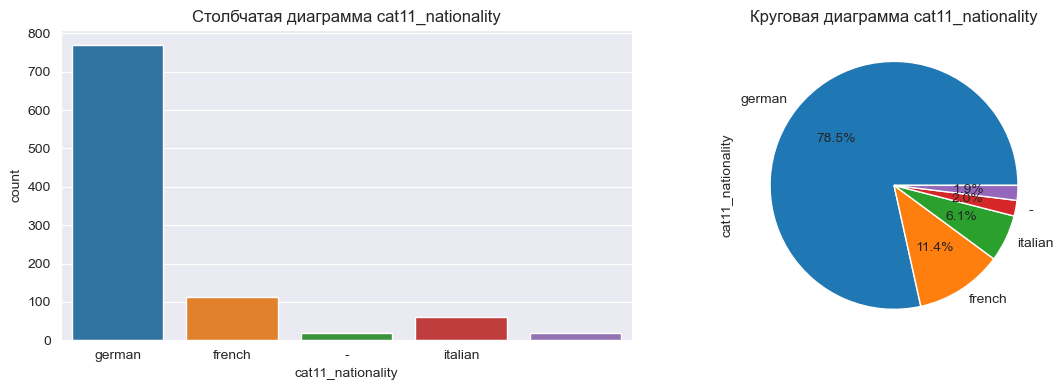

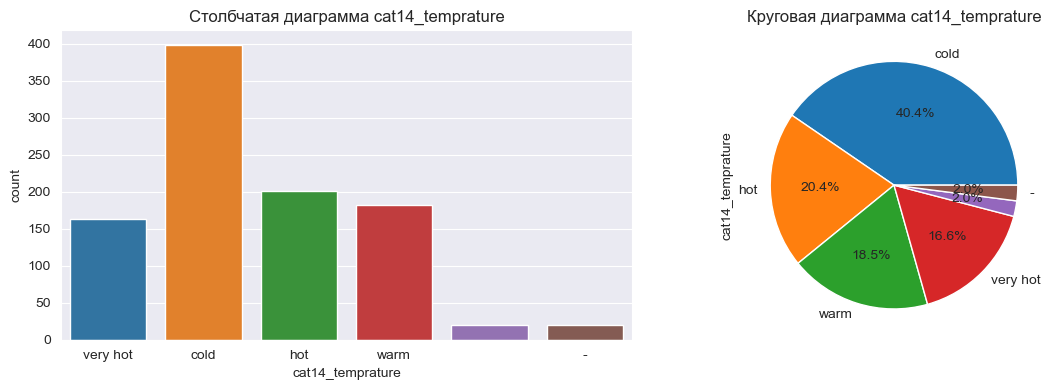

C:\Users\sagop\AppData\Local\Temp\ipykernel_26324\1335481826.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


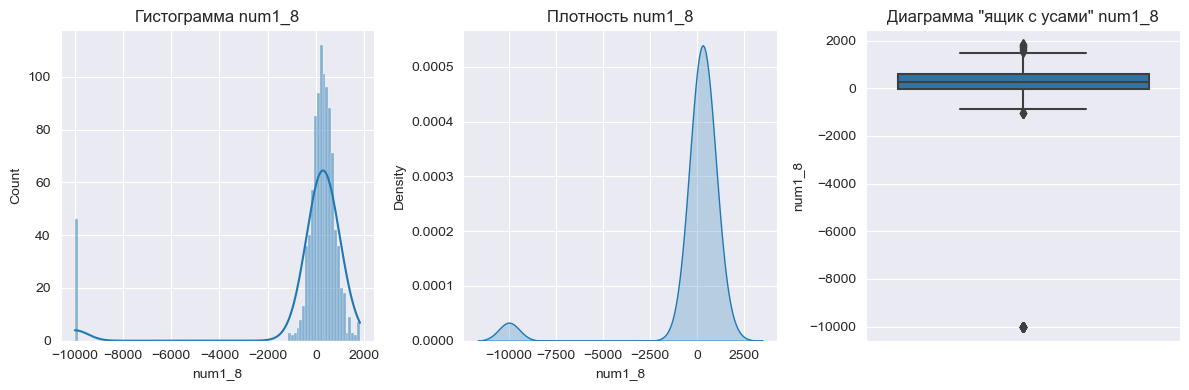

C:\Users\sagop\AppData\Local\Temp\ipykernel_26324\1335481826.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


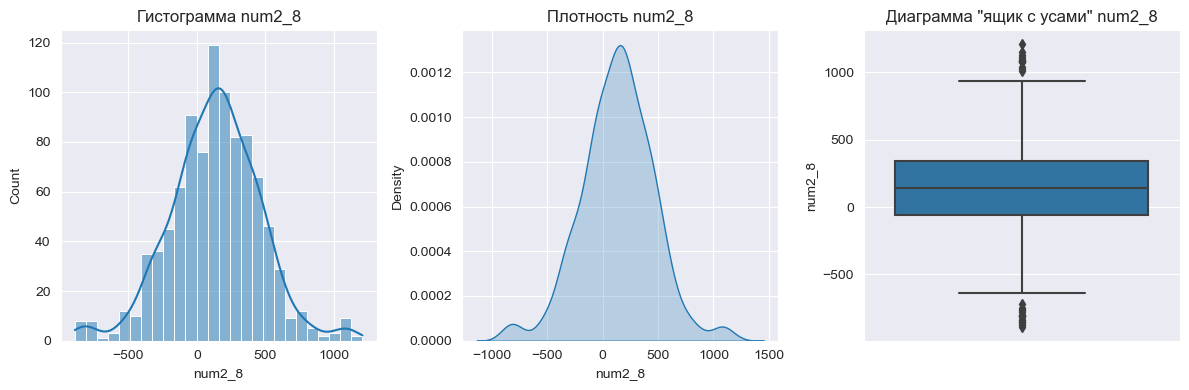

C:\Users\sagop\AppData\Local\Temp\ipykernel_26324\1335481826.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


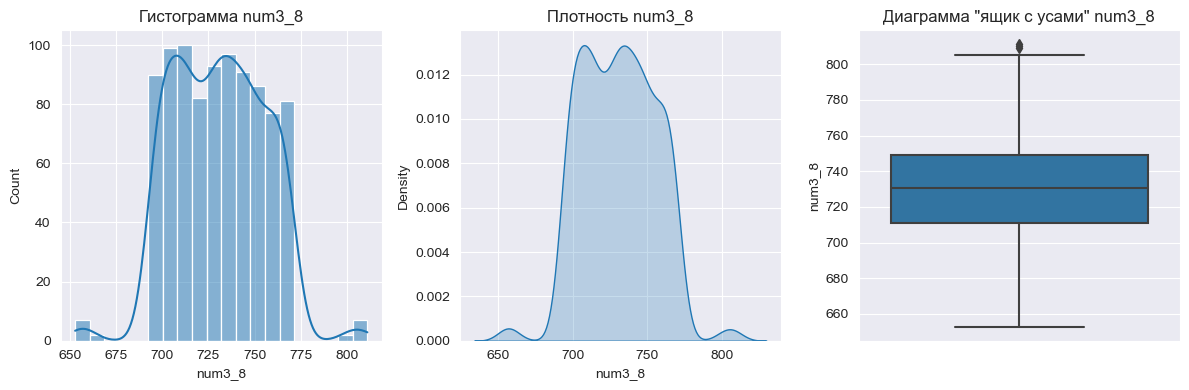

In [146]:
# Определение типа каждого признака
qualitative_features = ['cat11_nationality', 'cat14_temprature']
quantitative_features = ['num1_8', 'num2_8', 'num3_8']
df[qualitative_features] = df[qualitative_features].apply(lambda x: x.str.lower())
# Построение визуальных представлений для каждого признака
for feature in qualitative_features:
    plt.figure(figsize=(12, 4))

    # Столбчатая диаграмма
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Столбчатая диаграмма {feature}')

    # Круговая диаграмма
    plt.subplot(1, 2, 2)
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Круговая диаграмма {feature}')

    plt.tight_layout()
    plt.show()

for feature in quantitative_features:
    plt.figure(figsize=(12, 4))

    # Гистограмма
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Гистограмма {feature}')

    # Оценка плотности распределения
    plt.subplot(1, 3, 2)
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Плотность {feature}')

    # Диаграмма "ящик с усами"
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[feature])
    plt.title(f'Диаграмма "ящик с усами" {feature}')

    plt.tight_layout()
    plt.show()
    

2. Провести проверку правдоподобности исходных данных
Проверка правдоподобности исходных данных должна включать
проверку типов исходных данных, лишних пропусков, невозможных
значений и т.п. Привести найденные значения к нужному формату.

In [147]:
print("Типы данных")
print(df.dtypes)

Типы данных
cat11_nationality     object
cat14_temprature      object
num1_8               float64
num2_8               float64
num3_8               float64
dtype: object


Пропуски в датасете

In [148]:
print("Пропуски в данных")
print(df.isnull().sum())

Пропуски в данных
cat11_nationality    20
cat14_temprature     16
num1_8                0
num2_8               46
num3_8               86
dtype: int64


Описательные статистики

In [149]:
df.describe()

,num1_8,num2_8,num3_8
count,1000.000000,954.000000,914.000000
mean,-155.877022,134.374142,730.771759
std,2207.055467,327.357183,24.636383
min,-9999.000000,-887.821952,652.836741
25%,-18.701641,-58.014155,710.722143
50%,275.546033,137.603801,730.694978
75%,579.951628,343.120320,749.361485
max,1835.649006,1206.981624,811.118277


3. Поиск аномальных значений.
Провести поиск значений в исходном наборе данных, резко
отличающихся от других значений (выбросов). Строки с
найденными выбросами удалить из исходного набора данных.
Примечание: для поиска выбросов воспользоваться методом сигм
(использовать готовую реализацию scipy.stats.sigmaclip) и метод
квартилей (реализовать самостоятельно). Провести анализ
полученных результатов. Использовать результаты очистки данных,
полученных с помощью метода сигм.
Найдём выбросы в датасете

In [150]:
# Метод квартилей
def find_outliers_iqr(data, column):
    Q1 = data[column].dropna().quantile(0.25)  
    Q3 = data[column].dropna().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Метод сигм
def find_outliers_sigma(data, column, sigma=3):
    data_filtered = data[column].dropna()  
    data_sigma_clipped, _, _ = sigmaclip(data_filtered, sigma, sigma)
    outliers = data[~data[column].isin(data_sigma_clipped)]
    return outliers

# Получение индексов строк с выбросами для каждого столбца
outliers_index_iqr_1 = find_outliers_iqr(df, 'num1_8').index
outliers_index_sigma_1 = find_outliers_sigma(df, 'num1_8').index

df['num2_8'] = df['num2_8'].fillna(df['num2_8'].mean())
df['num3_8'] = df['num3_8'].fillna(df['num3_8'].mean())

# Получение индексов строк с выбросами для каждого столбца
outliers_index_iqr_2 = find_outliers_iqr(df, 'num2_8').index
outliers_index_sigma_2 = find_outliers_sigma(df, 'num2_8').index

# Получение индексов строк с выбросами для каждого столбца
outliers_index_iqr_3 = find_outliers_iqr(df, 'num3_8').index
outliers_index_sigma_3 = find_outliers_sigma(df, 'num3_8').index

# Объединение индексов выбросов
outliers_index = (
    outliers_index_iqr_1.union(outliers_index_sigma_1)
    .union(outliers_index_iqr_2)
    .union(outliers_index_sigma_2)
    .union(outliers_index_iqr_3)
    .union(outliers_index_sigma_3)
)

# Удаление строк с найденными выбросами из исходного набора данных
df = df.drop(outliers_index)

data_cleaned = df.replace(df['num2_8'].mean(), np.nan)
# Замена обратно на пропущенные значения
data_cleaned = data_cleaned.replace(df['num3_8'].mean(), np.nan)

print("Пропущенные значения в очищенных данных:")
print(data_cleaned.isnull().sum())

# Проверка наличия выбросов и вычисление процента удаленных данных
if len(df) > 0:
    percent_removed = len(outliers_index) / len(df) * 100
    print("Процент удаленных данных:", percent_removed)
else:
    print("Процент удаленных данных: 0")

data_cleaned.to_excel('cleaned_data.xlsx', index=False)

Пропущенные значения в очищенных данных:
cat11_nationality    17
cat14_temprature     15
num1_8                0
num2_8                0
num3_8                0
dtype: int64
Процент удаленных данных: 12.359550561797752


4. Поиск и восстановление пропущенных значений.
Провести поиск пропущенных значений в исходных данных.
Вывести статистику по пропускам для каждого признака.
Восстановить пропущенные значения. Примечание: для первого
признака для восстановления пропусков использовать метод 𝑘-
ближайших соседей, для второго пропущенные значения заменить
самым популярным значением, для третьего использовать среднее
значение, для четвертого – медиану, для пятого – метод «𝑘-
ближайших соседей». Для восстановления пропусков методом «k-ближайших соседей» использовать одну из готовых реализаций
sklearn.impute.KNNImputer, impyute.imputation.cs.fast_knn).

In [151]:
df = pd.read_excel('cleaned_data.xlsx')

df.replace(' ', np.nan, inplace=True)

label_encoder = LabelEncoder()
imputer = KNNImputer(n_neighbors=5)

# Избавление от пропусков методом K-ближайших соседей для первого признака
encoded_data = label_encoder.fit_transform(df.iloc[:, 0])
encoded_data = encoded_data.reshape(-1, 1)
imputed_data = imputer.fit_transform(encoded_data)
df.iloc[:, 0] = imputed_data
df.iloc[:, 0] = df.iloc[: , 0].astype(int)

# Избавление от пропусков заменой популярного значения для второго признака
most_common_value = df.iloc[:, 1].value_counts().idxmax()
df.fillna({df.columns[1]: most_common_value}, inplace=True)

# Избавление от пропусков заменой среднего значения для третьего признака
mean_value = df.iloc[:, 2].mean()
df.fillna({df.columns[2]: mean_value}, inplace=True)

# Избавление от пропусков заменой медианы для четвёртого признака
median_value = df.iloc[:, 3].median()
df.fillna({df.columns[3]: median_value}, inplace=True)

# Избавление от пропусков методом K-ближайших соседей для пятого признака
df.iloc[:, 4] = imputer.fit_transform(df.iloc[:, 4].values.reshape(-1, 1))

print("Пропуски каждого признака")
print(df.isnull().sum())

df.to_excel("processed_data.xlsx", index=False)

Пропуски каждого признака
cat11_nationality    0
cat14_temprature     0
num1_8               0
num2_8               0
num3_8               0
dtype: int64


C:\Users\sagop\AppData\Local\Temp\ipykernel_26324\3994109992.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = imputed_data
C:\Users\sagop\AppData\Local\Temp\ipykernel_26324\3994109992.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = df.iloc[: , 0].astype(int)


5. Преобразование данных
Привести числовые признаки к стандартному виду. Для 
категориальных признаков выполнить их кодировку. Примечание: 
для количественных переменных выполняем стандартизацию и 
нормализацию, для качественных переменных – one-hot encoding
(для первого) и label encoding (для второго). Для преобразования 
использовать готовую реализацию sklearn.preprocessing.

In [152]:
data = pd.read_excel('processed_data.xlsx')
scaler = StandardScaler()
data[['num1_8', 'num2_8', 'num3_8']] = scaler.fit_transform(data[['num1_8', 'num2_8', 'num3_8']])

# Нормализация числовых признаков
scaler = MinMaxScaler()
data[['num1_8', 'num2_8', 'num3_8']] = scaler.fit_transform(data[['num1_8', 'num2_8', 'num3_8']])

# Применение one-hot encoding к первому категориальному столбцу
encoder = OneHotEncoder()
encoded_categories = encoder.fit_transform(data[['cat11_nationality']])
encoded_df = pd.DataFrame(encoded_categories.toarray(), columns=encoder.get_feature_names_out(['cat11_nationality']))
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=['cat11_nationality'], inplace=True)

# Label encoding для категориального признака второго
label_encoder = LabelEncoder()
data['cat14_temprature'] = label_encoder.fit_transform(data['cat14_temprature'])
data.head()

,cat14_temprature,num1_8,num2_8,num3_8,cat11_nationality_0,cat11_nationality_1,cat11_nationality_2,cat11_nationality_3,cat11_nationality_4
0,3,0.481190,0.560175,0.492624,0.0,0.0,1.0,0.0,0.0
1,1,0.661191,0.465121,0.423523,0.0,0.0,1.0,0.0,0.0
2,3,0.476520,0.399724,0.631491,0.0,0.0,1.0,0.0,0.0
3,3,0.798273,0.763567,0.952432,0.0,0.0,1.0,0.0,0.0
4,1,0.413518,0.443404,0.960741,0.0,0.0,1.0,0.0,0.0


# Вывод: 
получены навыки работы с предварительной обработкой данных.